In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import cv2
import matplotlib.pyplot as plt
from algorithm import create_panoramic_view

# **Panoramic creator experimentation** - Computer Vision and 3D Reconstruction

**Author:** Cristian Comellas Fluxá

---

## Introduction

In this notebook a set of tests related to the algorithm for creating panoramas from images is performed. Variations in the match ratio and the keypoint detector will be tested.

## Experiments

In this section experiments will be carried out to test the performance of the panoramic creation algorithm.

Before starting, a function is created that will be used as an auxiliary function to load the images used in the experiments.

In [3]:
def read_images(name, extension='jpg', n=3):
    images = []
    for i in range(1, n+1):
        img = cv2.imread(f'./images/{name}{i}.{extension}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return images

### Matching ratio experiments

In this section, experiments will be carried out to test the performance of the panoramic creation algorithm with different matching ratios. 

The matching ratio is the ratio between the distance of the first and second best matches of each keypoint. The lower the ratio, the more similar the first and second best matches are, and therefore the more difficult it is to find the correct match. When we decrease the matching ratio, we reduce the number of matches we consider correct, and therefore the number of matches we use to calculate the homography matrix. This aids to discard bad matches improving the quality of the final panorama, but it also makes it more difficult to find enough correct matches.

We are going to test the algorithm with matching ratios of 0.5, 0.6, 0.7, 0.8 and 0.9.

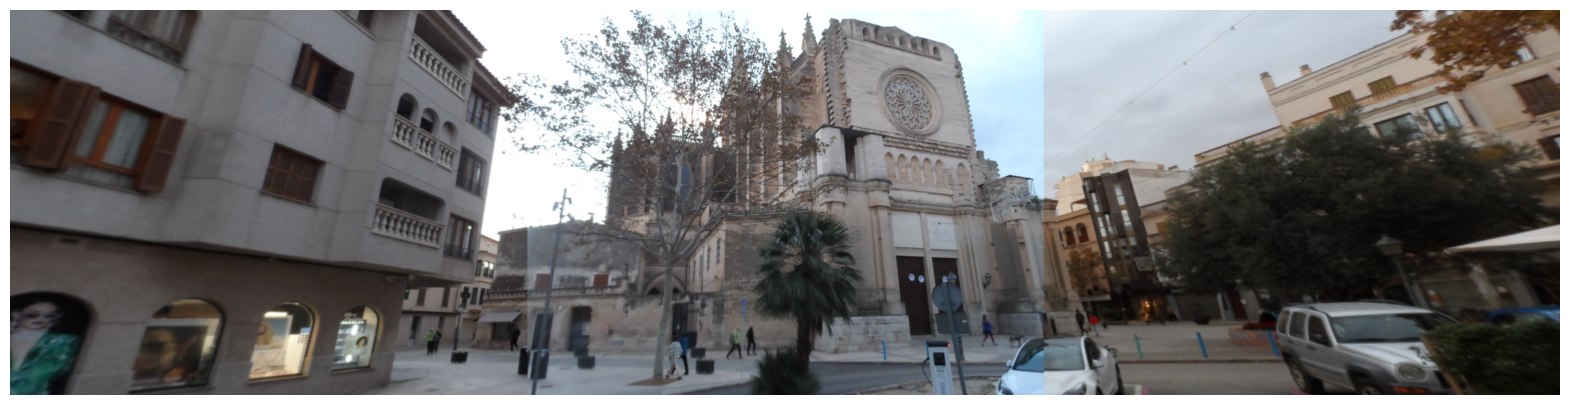

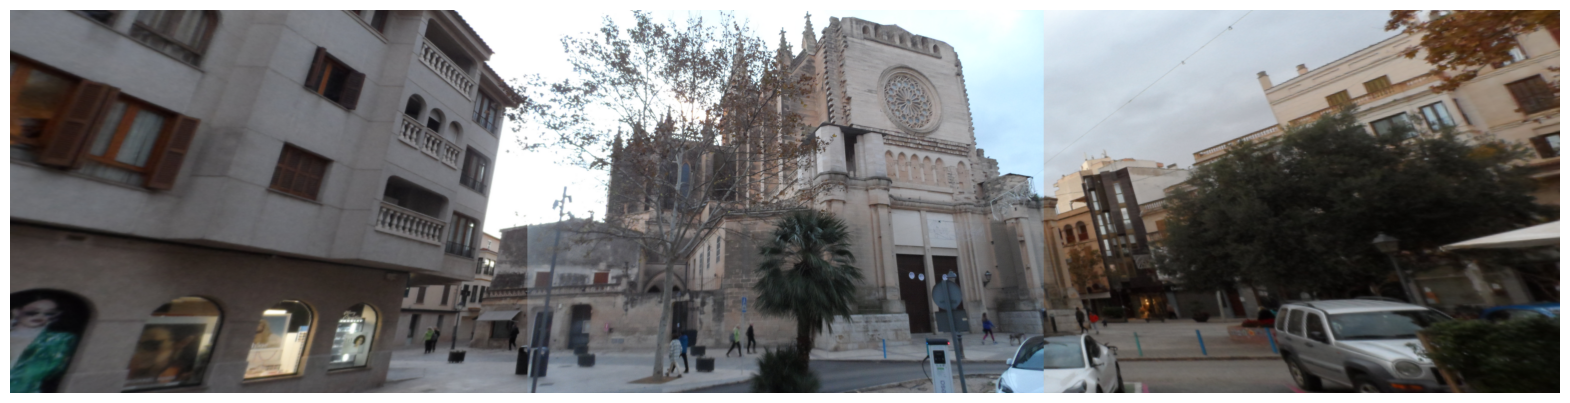

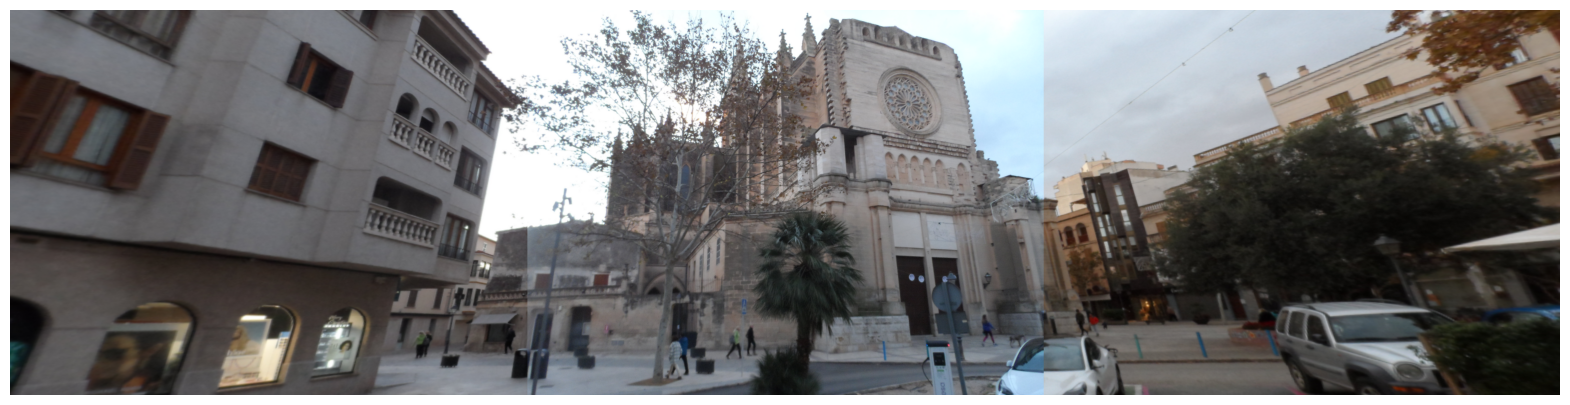

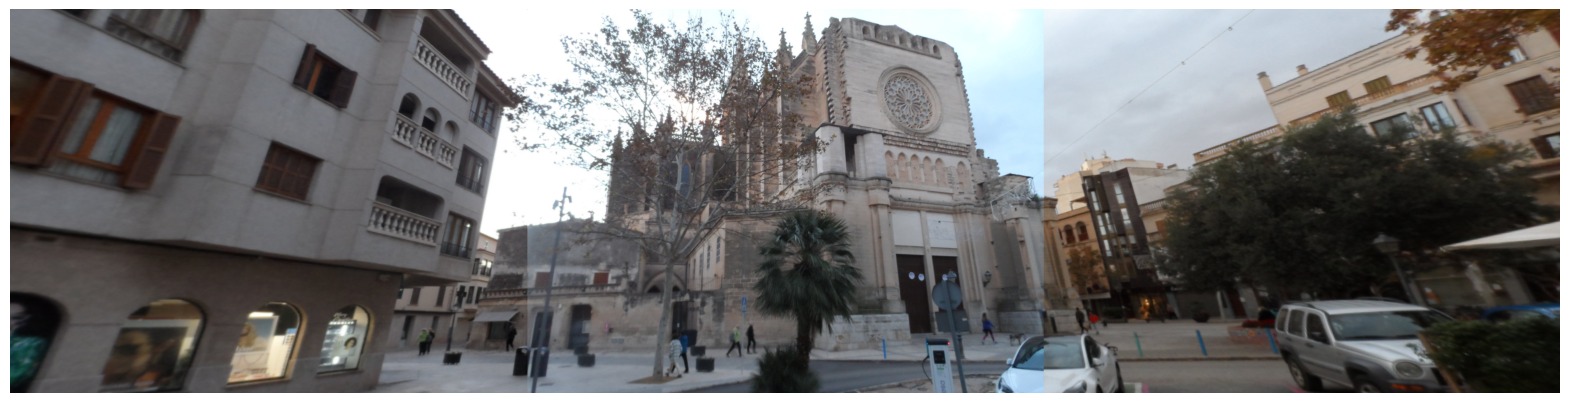

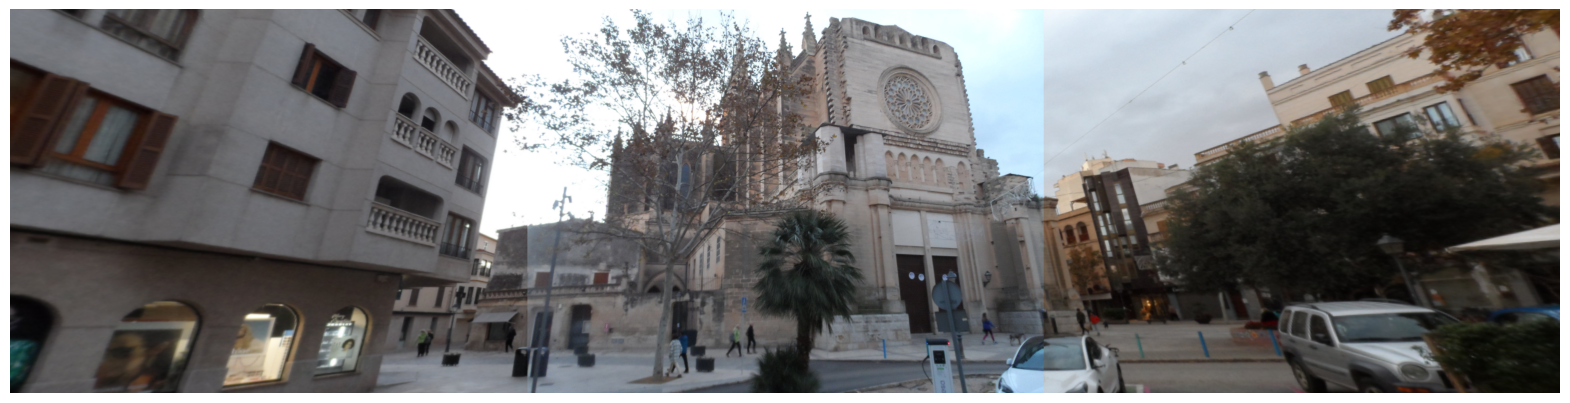

In [5]:
ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
images = read_images('panoramica_ejemplo', extension='png', n=3)

for ratio in ratios:
    _, _, final = create_panoramic_view(images, match_ratio=ratio, verbose=False, crop=True)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    ax.axis('off')
    ax.imshow(final);

# _, _, final = create_panoramic_view(images, match_ratio=0.65, verbose=True, crop=True)


# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(111)
# ax.axis('off')
# ax.imshow(final);

We can see that in this case by increasing the matching ratio, we obtain a more accurate result, which can be observed in the alignment of the car.

### Keypoint detector experiments

### Crop experiments

When creating panoramas, you sometimes get images with black sections around the image. This is due to the fact that when calculating the homography, you obtain points that are outside the image. To solve this, a crop can be applied to the resulting image, eliminating the black sections. A continuación, se muestra la diferencia entre aplicar un crop y no aplicarlo para un ejemplo en el que estos bordes son muy evidentes.

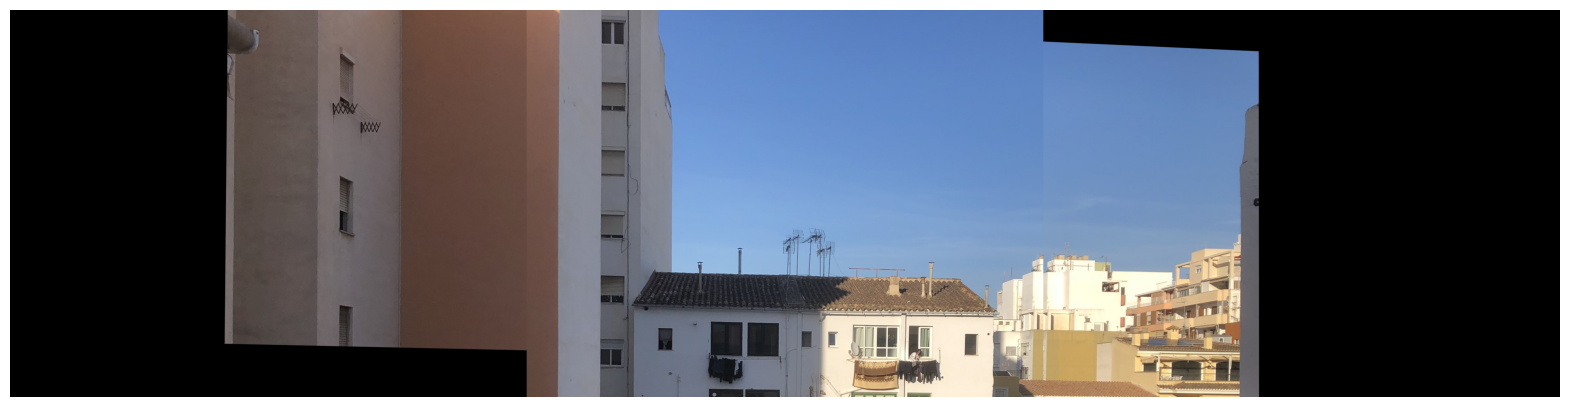

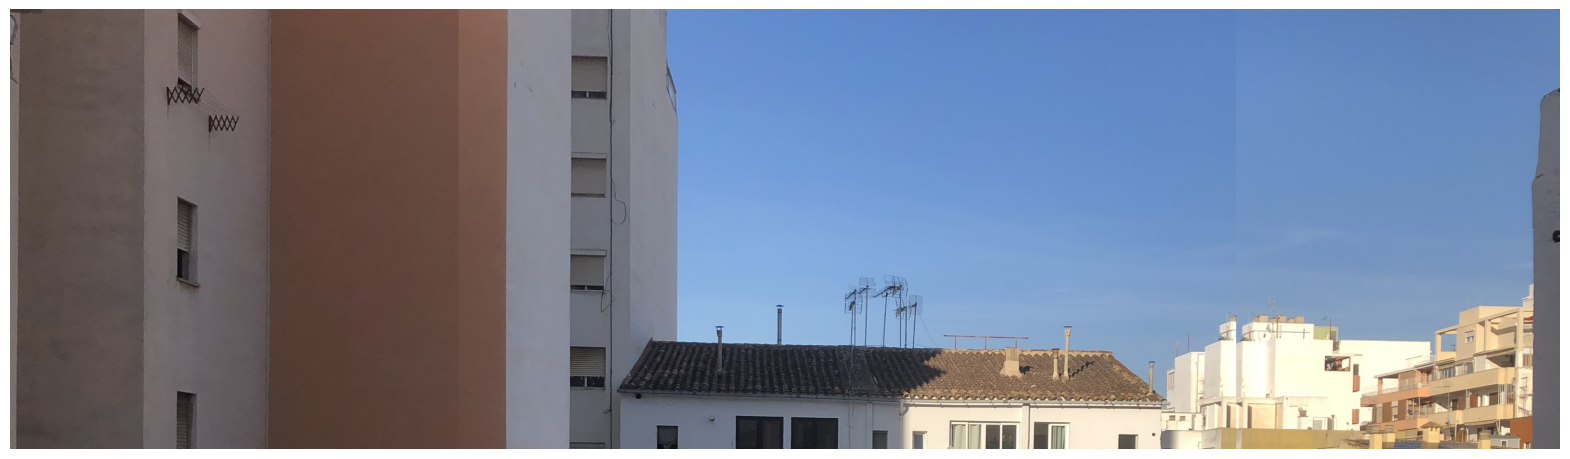

In [7]:
images = read_images('terraza', extension='jpg', n=3)

# WIHTOUT CROP
_, _, final = create_panoramic_view(images, match_ratio=ratio, verbose=False, crop=False)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.axis('off')
ax.imshow(final);

# WITH CROP
_, _, final = create_panoramic_view(images, match_ratio=ratio, verbose=False, crop=True)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.axis('off')
ax.imshow(final);


The second image corresponds to the largest rectangle that can be drawn inside the image without introducing black borders.